## Metric plots for poster

In [1]:
import pandas as pd
from pprint import pprint

v1_v3_eval = pd.read_csv("data/v1_v3_evaluation_result.csv")
v1_v4_eval = pd.read_csv("data/v1_v4_evaluation_result.csv")
v2_v3_eval = pd.read_csv("data/v2_v3_evaluation_result.csv")
v2_v4_eval = pd.read_csv("data/v2_v4_evaluation_result.csv")

v1_v3_mean_eval = pd.read_json("data/v1_v3_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v1_v3_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v1_v3_mean_eval.index = v1_v3_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v1_v4_mean_eval = pd.read_json("data/v1_v4_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v1_v4_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v1_v4_mean_eval.index = v1_v4_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v2_v3_mean_eval = pd.read_json("data/v2_v3_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v2_v3_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v2_v3_mean_eval.index = v2_v3_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

v2_v4_mean_eval = pd.read_json("data/v2_v4_evaluation_result_mean.json", typ='series').drop(['categ_mean_similarity_score'])
v2_v4_mean_eval.index = ['mean_similarity', 'mean_comprehensiveness', 'mean_groundedness']
v2_v4_mean_eval.index = v2_v4_mean_eval.index.str.replace('mean_similarity', 'mean_groundtruth_agreement')

# Combine all evaluations into a single DataFrame
combined_eval = pd.DataFrame({
    'v1_v3': v1_v3_mean_eval,
    'v1_v4': v1_v4_mean_eval,
    'v2_v3': v2_v3_mean_eval,
    'v2_v4': v2_v4_mean_eval
})


#### Metric overview

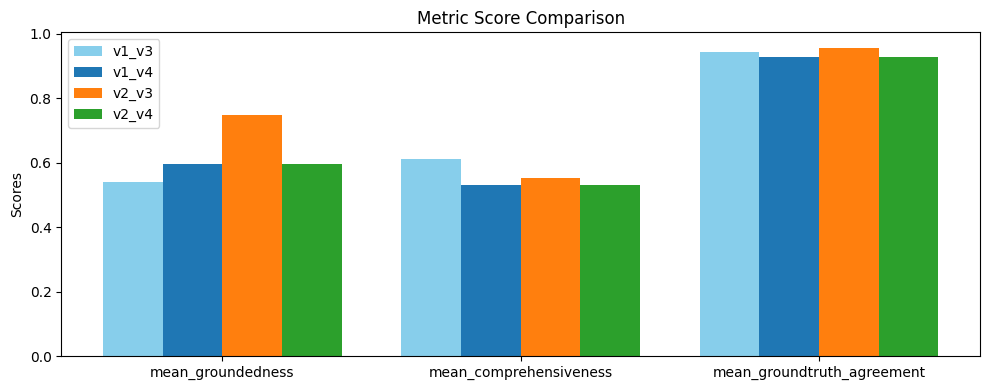

In [2]:
import matplotlib.pyplot as plt

# Create a single figure and axis with a smaller size
fig, ax = plt.subplots(figsize=(10, 4))

# Reorder the indices to start with 'groundedness'
reordered_indices = ['mean_groundedness', 'mean_comprehensiveness', 'mean_groundtruth_agreement']

# Plot all evaluations on the same bar chart with reordered indices using slightly darker colors
ax.bar(range(len(reordered_indices)), v1_v3_mean_eval[reordered_indices], width=0.2, label='v1_v3', align='center', color=(135/255, 206/255, 235/255))  # Slightly darker blue
ax.bar([x + 0.2 for x in range(len(reordered_indices))], v1_v4_mean_eval[reordered_indices], width=0.2, label='v1_v4', align='center')#, color=(102/255, 205/255, 102/255))  # Slightly darker green
ax.bar([x + 0.4 for x in range(len(reordered_indices))], v2_v3_mean_eval[reordered_indices], width=0.2, label='v2_v3', align='center')#, color=(186/255, 85/255, 211/255))  # Slightly darker purple
ax.bar([x + 0.6 for x in range(len(reordered_indices))], v2_v4_mean_eval[reordered_indices], width=0.2, label='v2_v4', align='center')#, color=(255/255, 165/255, 79/255))  # Slightly darker orange

# Set titles and labels
ax.set_title('Metric Score Comparison')
# ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_xticks([x + 0.3 for x in range(len(reordered_indices))])
ax.set_xticklabels(reordered_indices)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Eval metrics per category

In [3]:
import matplotlib.pyplot as plt

# Calculate mean values for all evaluation data
eval_means = {
    'v1_v3': v1_v3_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna(),
    'v1_v4': v1_v4_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna(),
    'v2_v3': v2_v3_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna(),
    'v2_v4': v2_v4_eval.drop(columns=['company_list']).groupby('category')[['groundedness_score', 'comprehensiveness_score', 'similarity_score']].mean().dropna()
}

# Create a figure with 4 subplots horizontally
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
fig.suptitle('Metric Scores per Category Comparison', fontsize=24, y=1.05)

# Colors for the bars
colors = [(70/255, 40/255, 255/255, 0.6),    # Blue
         (255/255, 120/255, 100/255, 0.5),   # Pink-Red
         (144/255, 238/255, 144/255, 0.8)]   # Light Green

# Plot each evaluation data
for idx, (name, data) in enumerate(eval_means.items()):
    # Sort by groundedness score
    data_sorted = data.sort_values(by='groundedness_score', ascending=True)
    
    # Create horizontal bar plot
    data_sorted.plot(kind='barh', ax=axes[idx], width=0.85, color=colors)
    
    # Customize each subplot
    axes[idx].set_xlabel('Scores', fontsize=12)
    axes[idx].set_ylabel('Category', fontsize=12)
    axes[idx].set_title(f'{name} Evaluation', fontsize=16)
    axes[idx].tick_params(axis='both', labelsize=10)
    
    # Only show legend for the last subplot
    if idx == 3:
        axes[idx].legend(['Groundedness', 'Comprehensiveness', 'Similarity'], 
                        loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1))
    else:
        axes[idx].legend().remove()

plt.tight_layout()
plt.show()

KeyError: "['company_list'] not found in axis"

# Dataset Overview ( company, product, category )
- Count the number of companies and products per category 

In [23]:
import pandas as pd
import ast

v1_v3_comparison_table_for_evaluation = pd.read_csv("data/v1_v3_comparison_table_for_evaluation.csv")
v1_v4_comparison_table_for_evaluation = pd.read_csv("data/v1_v4_comparison_table_for_evaluation.csv")
v2_v3_comparison_table_for_evaluation = pd.read_csv("data/v2_v3_comparison_table_for_evaluation.csv")
v2_v4_comparison_table_for_evaluation = pd.read_csv("data/v2_v4_comparison_table_for_evaluation.csv")

### Basic Categorization Prompt(v1) + Basic/Advanced Comparison Prompt(v3/v4)

##### v1_v3 result dataset overview

In [25]:
v1_v3_company_set = set()
v1_v3_product_set = set()
for idx, row in v1_v3_comparison_table_for_evaluation.iterrows():
    v1_v3_company_set.update(ast.literal_eval(row['company_names']))
    v1_v3_product_set.update(ast.literal_eval(row['product_names']))

print('v1_v3 company count : ', len(v1_v3_company_set))
print('v1_v3 product count : ', len(v1_v3_product_set))
print('v1_v3 category count : ', len(v1_v3_comparison_table_for_evaluation))

v1_v3 company count :  8
v1_v3 product count :  532
v1_v3 category count :  23


##### v1_v4 result dataset overview

In [38]:
v1_v4_company_set = set()
v1_v4_product_set = set()
for idx, row in v1_v4_comparison_table_for_evaluation.iterrows():
    v1_v4_company_set.update(ast.literal_eval(row['company_names']))
    v1_v4_product_set.update(ast.literal_eval(row['product_names']))

print('v1_v4 company count : ', len(v1_v4_company_set))
print('v1_v4 product count : ', len(v1_v4_product_set))
print('v1_v4 category count : ', len(v1_v4_comparison_table_for_evaluation))

v1_v4 company count :  8
v1_v4 product count :  532
v1_v4 category count :  23


### Advanced Categorization Prompt(v2) + Basic/Advanced Comparison Prompt(v3/v4)

##### v2_v3 result dataset overview 

In [40]:
v2_v3_company_set = set()
v2_v3_product_set = set()
for idx, row in v2_v3_comparison_table_for_evaluation.iterrows():
    v2_v3_company_set.update(ast.literal_eval(row['company_names']))
    v2_v3_product_set.update(ast.literal_eval(row['product_names']))

print('v2_v3 company count : ', len(v2_v3_company_set))
print('v2_v3 product count : ', len(v2_v3_product_set))
print('v2_v3 category count : ', len(v2_v3_comparison_table_for_evaluation))

v2_v3 company count :  8
v2_v3 product count :  401
v2_v3 category count :  23


##### v2_v4 result dataset overview 

In [39]:
v2_v4_company_set = set()
v2_v4_product_set = set()
for idx, row in v2_v4_comparison_table_for_evaluation.iterrows():
    v2_v4_company_set.update(ast.literal_eval(row['company_names']))
    v2_v4_product_set.update(ast.literal_eval(row['product_names']))

print('v2_v4 company count : ', len(v2_v4_company_set))
print('v2_v4 product count : ', len(v2_v4_product_set))
print('v2_v4 category count : ', len(v2_v4_comparison_table_for_evaluation))

v2_v4 company count :  8
v2_v4 product count :  401
v2_v4 category count :  23
